In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

> **2.1** sampling

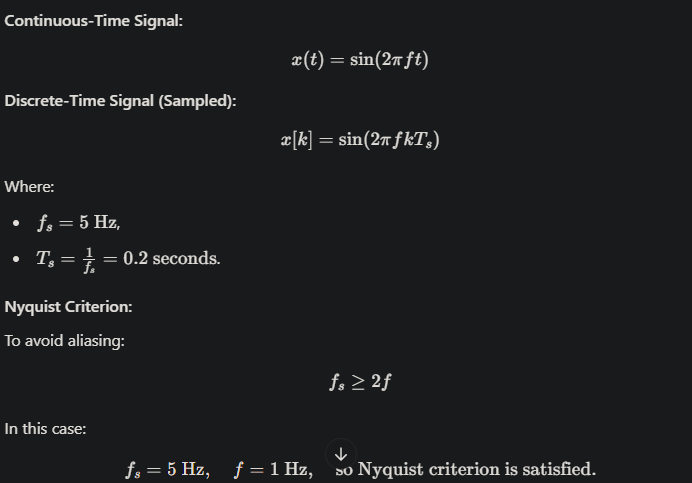

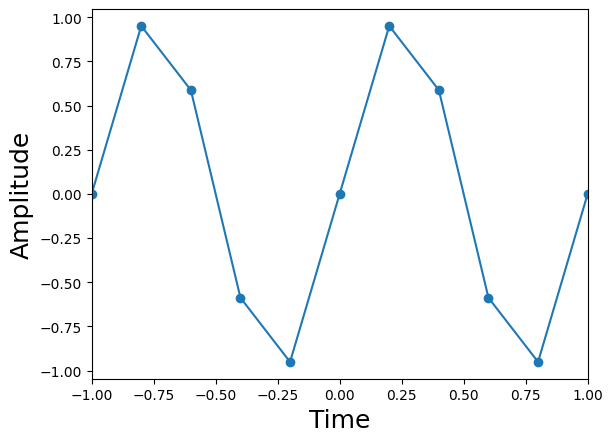

In [2]:
from __future__ import division
import matplotlib.pyplot as plt  # Import for plotting
import numpy as np  # Import for mathematical operations

# Create the figure and axis
fig, ax = plt.subplots()

# Define the signal frequency and sampling rate
f = 1.0  # Hz, signal frequency
fs = 5.0  # Hz, sampling rate (fs >= 2 * f)

# Check for Nyquist criterion (optional but recommended)
if fs < 2 * f:
    raise ValueError("Sampling rate fs must be at least twice the signal frequency f (Nyquist criterion).")

# Generate the sample interval, symmetric for convenience
t = np.arange(-1, 1 + 1/fs, 1/fs)  # Time vector for sampling

# Generate the signal
x = np.sin(2 * np.pi * f * t)  # Signal in time domain

# Plot the signal
ax.plot(t, x, 'o-')  # Use standard ASCII quotes

# Label the plot
ax.set_xlabel('Time', fontsize=18)  # Correct quotes for label
ax.set_ylabel('Amplitude', fontsize=18)

# Display the plot
plt.xlim(-1,1)
plt.show()

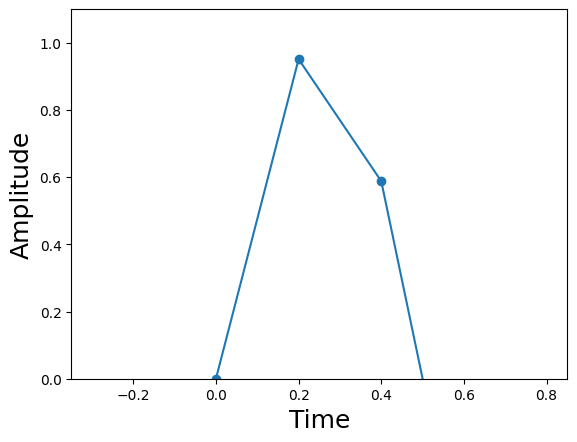

In [3]:
fig, ax = plt.subplots()  # Create a figure and axis for plotting
ax.plot(t, x, 'o-')  # Plot the signal with circle markers and lines connecting them

# Set the limits for the axes
ax.axis([1/(4*f) - 1/fs*3, 1/(4*f) + 1/fs*3, 0, 1.1])  # Setting x and y limits, ax.axis([...]): This method sets the limits of the axes in the format [xmin, xmax, ymin, ymax]

# Label the axes
ax.set_xlabel('Time', fontsize=18)  # Label for x-axis
ax.set_ylabel('Amplitude', fontsize=18)  # Label for y-axis

# Show the plot
plt.show()

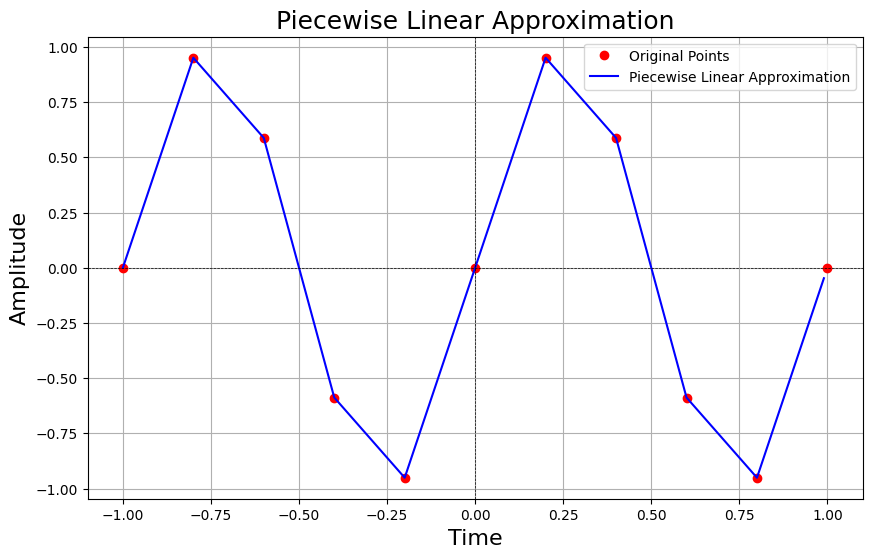

In [4]:
# Sample time points and corresponding values (for example)

# Initialize lists for piecewise domains and approximations
interval = []  # piecewise domains
apprx = []     # line on domains

# Build up points *evenly* inside of intervals
tp = np.hstack([np.linspace(t[i], t[i + 1], 20, endpoint=False) for i in range(len(t) - 1)])

# Construct arguments for piecewise
for i in range(len(t) - 1):
    interval.append(np.logical_and(t[i] <= tp, tp < t[i + 1]))  # Check which tp values fall in the current interval
    apprx.append((x[i + 1] - x[i]) / (t[i + 1] - t[i]) * (tp[interval[-1]] - t[i]) + x[i])  # Linear interpolation

# Use np.piecewise to create the piecewise linear approximation
x_hat = np.piecewise(tp, interval, apprx)  # Piecewise linear approximation
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot original points
plt.plot(t, x, 'ro', label='Original Points')  # Red dots for original points

# Plot piecewise linear approximation
plt.plot(tp, x_hat, 'b-', label='Piecewise Linear Approximation')  # Blue line for approximation

# Adding labels and title
plt.title('Piecewise Linear Approximation', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.axhline(0, color='black', lw=0.5, ls='--')  # Horizontal line at y=0
plt.axvline(0, color='black', lw=0.5, ls='--')  # Vertical line at x=0
plt.legend()
plt.grid()
plt.show()

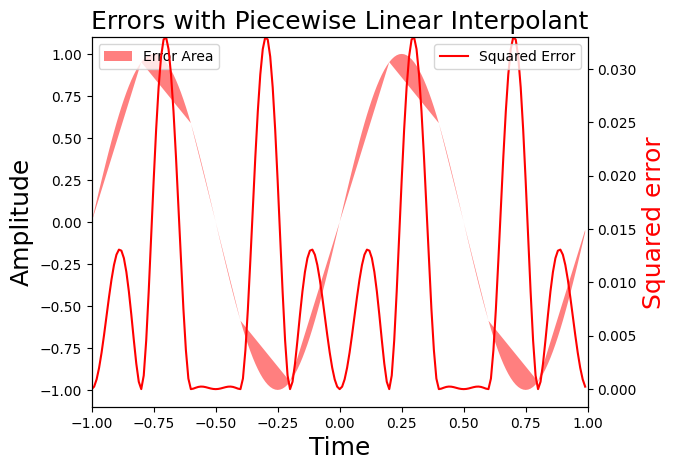

In [5]:
# Create a new figure and axes
fig, ax1 = plt.subplots()

# Fill in the difference between the interpolant and the sine wave
ax1.fill_between(tp, x_hat, np.sin(2 * np.pi * f * tp), facecolor="red", alpha=0.5, label='Error Area')
ax1.set_xlabel('Time', fontsize=18)
ax1.set_ylabel('Amplitude', fontsize=18)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()  # create clone of ax1

# Compute the squared error
sqe = (x_hat - np.sin(2 * np.pi * f * tp))**2  # Squared error between approximation and actual sine wave

# Plot the squared error
ax2.plot(tp, sqe, 'r', label='Squared Error')  # Plot squared error in red
ax2.axis(xmin=-1, xmax=1, ymax=sqe.max())  # Set x-axis limits and adjust y-axis to maximum squared error
ax2.set_ylabel('Squared error', color='r', fontsize=18)

# Set the title for the plot
ax1.set_title('Errors with Piecewise Linear Interpolant', fontsize=18)

# Show legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

> 2.5
> **Reconstruction**


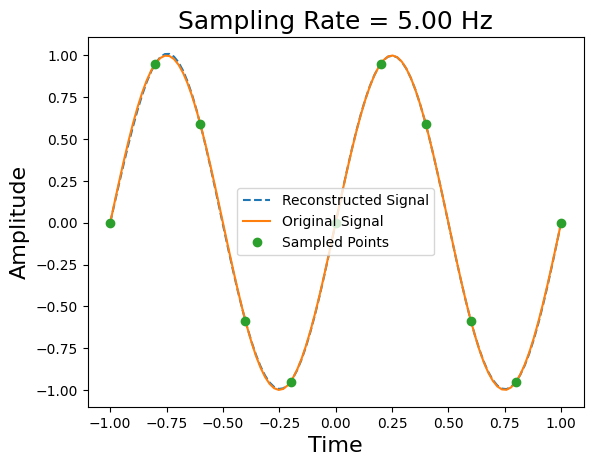

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling rate
fs = 5.00  # Sampling rate in Hz

# Create the figure and axis
fig, ax = plt.subplots()

# Define time vectors
t = np.linspace(-1, 1, 100)  # Fine-grained time vector for smooth plot
ts = np.arange(-1, 1 + 1/fs, 1/fs)  # Sample points based on sampling rate

# Number of sinc coefficients based on the number of sampled points
num_coeffs = len(ts)

# Initialize the summation (reconstructed signal)
sm = 0

# Loop for sinc interpolation
for k in range(-num_coeffs, num_coeffs):  # Use both negative and positive sinc terms for interpolation
    sm += np.sin(2 * np.pi * (k / fs)) * np.sinc(k - fs * t)

# Plot the reconstructed signal, original signal, and sampled points
ax.plot(t, sm, '--', label='Reconstructed Signal')  # Dashed line for sinc interpolated signal
ax.plot(t, np.sin(2 * np.pi * t), label='Original Signal')  # Solid line for original signal
ax.plot(ts, np.sin(2 * np.pi * ts), 'o', label='Sampled Points')  # Sample points as red dots

# Set the plot title and labels
ax.set_title('Sampling Rate = %3.2f Hz' % fs, fontsize=18)
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)

# Add legend
ax.legend()

# Show the plot
plt.show()